# Säljrapport

*Förslag på rapportstruktur*

## Introduktion

Här skriver vi en kort introduktion. 

**Importeringar för hela Notebooken** (rör ej)

In [1]:
import matplotlib.pyplot as plt 
from src.io_utils import * 
from src.metrics import * 
from src.viz import * 

**Förbereder data**

In [2]:
# Read
df = read_data("data/ecommerce_sales.csv")
 
# Clean
df_clean = clean_data(df)
 
#Visualize
print(df_clean.sample(3))
 
df_clean['month'] = df_clean.date.dt.month_name().sort_values(ascending=True)



      order_id       date       city     category   price  units  revenue
1230    101230 2024-03-28      Malmö  Electronics  431.78      3  1295.34
2040    102040 2024-06-02      Malmö       Sports   96.33      5   481.65
1796    101796 2024-01-11  Stockholm         Toys   50.00      4   200.00


## Nyckeltal

Här visualiserar vi våra nyckeltal. 

### 1. Vad säljer? – vilka kategorier driver mest intäkt?


**Nyckeltal:** Total intäkt och totalt antal enheter & Intäkt per kategori

**Sammanfattning:**
- Totala intäkterna visar sig vara ~3 502 767, medan totala antal enheter sålda är 7463.
- Av de 6 kategorier som säljs så drar Electronics in mest i intäkter enligt graferna nedan.
- Top 3 kategorier visar sig vara Electronics (1 364 228) följ av Sports category (734 653) och Clothing(586 744)
- När vi ser till den generella orderns intäkter så ser vi att Electronics drar in mest som medelintäkt per köp, men har även ett gäng outliers.
- Skulle det kunna vara så att våra outliers drar upp inkomsten som Electronics genererar? Om vi kollar antal outliers per kategori så är de relativt detsamma.
  Även när vi räknar bort intäkterna som outliers i Electronics står för (96 366) så vinner ändå Electronics (1 267 862) intäkter överlägset.


Total revenue       3502767.23
Total units sold       7463.00
dtype: float64


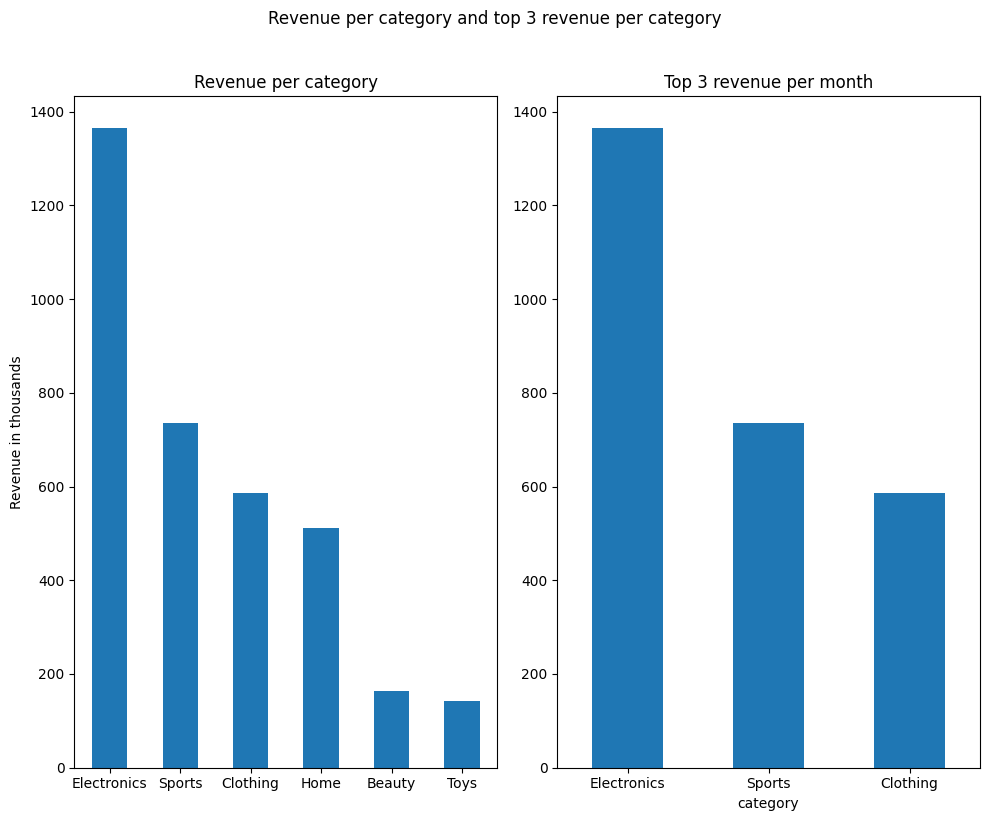

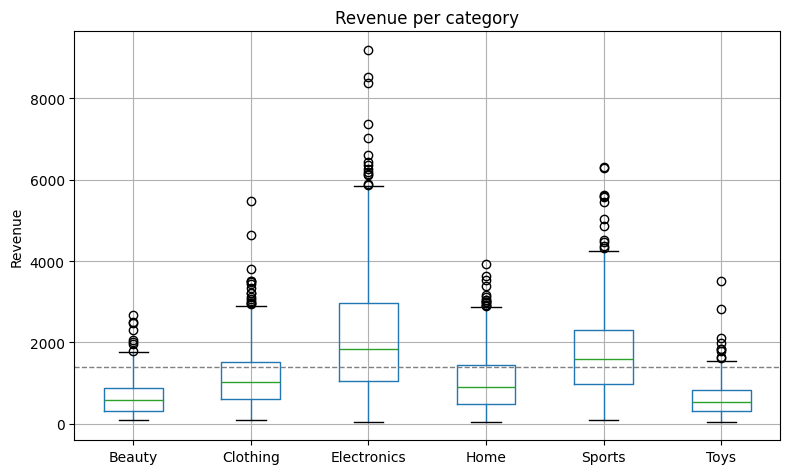

((Clothing       16
  Electronics    14
  Home           14
  Sports         12
  Toys            9
  Beauty          8
  dtype: int64,
  Electronics    96365.77
  Sports         62440.63
  Clothing       55747.18
  Home           44598.15
  Toys           19144.28
  Beauty         17764.60
  dtype: float64),
 Electronics    1267862.30
 Sports          672212.79
 Clothing        530997.73
 Home            466472.72
 Beauty          145289.37
 Toys            123871.71
 dtype: float64)

In [3]:
print(total_sum_and_total_units_sold(df_clean))
plot_revenue_per_category(df_clean)
boxplot_revenue_per_category(df_clean)
looking_for_them_outliers_in_category_revenue(df_clean)




### 2. Var säljer vi? – vilka städer står för störst intäkt?

**Sammanfattning:** 

Analysen visar städer per intäkter.
- Stockholm toppar listan med en total intäkt på cirka 1,23 miljoner kronor.
- Göteborg kommer på andra plats med ungefär 860 000 kronor i intäkter.
- Malmö är tredje störst med cirka 568 000 kronor i intäkter.

Denna information hjälper till att identifiera viktiga regioner som bidrar mest till försäljningen och kan användas för att rikta marknadsföring samt resurser mer effektivt.

The top 3 cities per revenue are:
        city  tot_rev_city
0  Stockholm    1227201.94
1   Göteborg     859019.65
2      Malmö     567926.32.


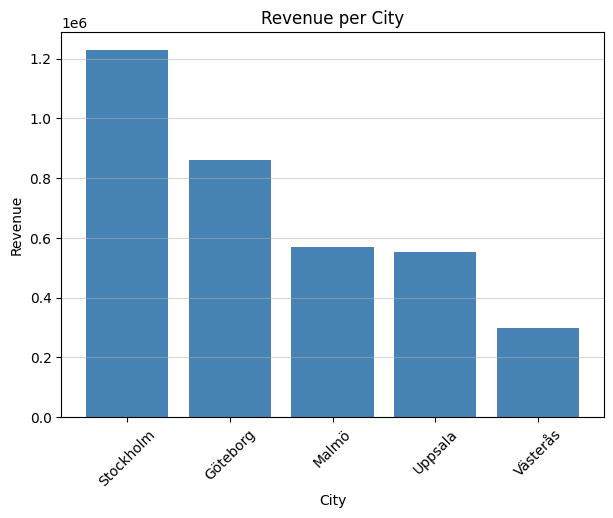

In [4]:
df_rev_city = revenue_per_city(df_clean)
print(f"The top 3 cities per revenue are:\n"
      f"{df_rev_city.head(3)}.")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_rev_city["city"], df_rev_city["tot_rev_city"], "Revenue per City", "City", "Revenue", color="#4682B4")
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

 **Nyckeltal:** TBD

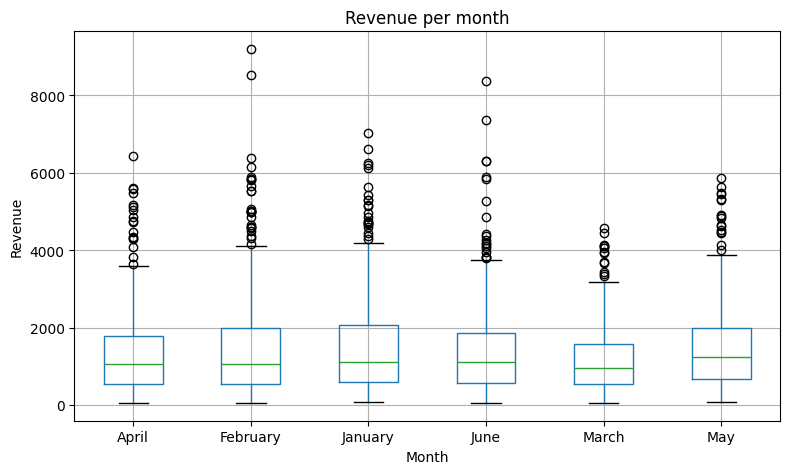

c:\Users\Jakob\Desktop\Github-projekt\Gruppuppgift\src\viz.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


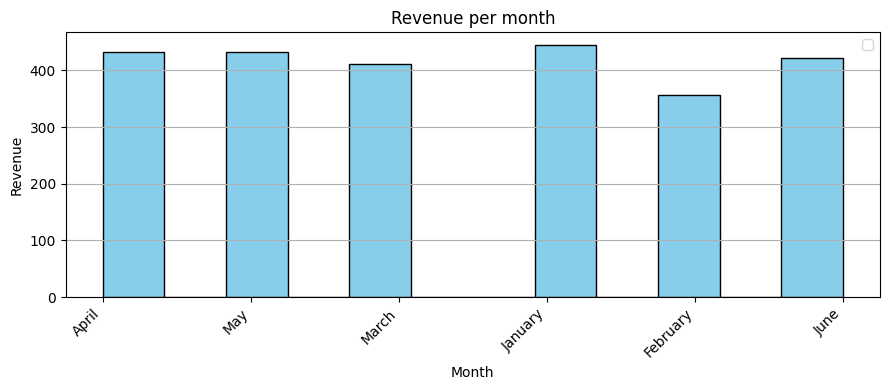

In [5]:
revenue_monthly_boxplot(df_clean)
revenue_monthly_bar(df_clean)

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.

**Sammanfattning:**
- Den genomsnittliga orderstorleken (AOV) hålls stabilt över tid första halvan av 2025, med undantag för en dipp i mars.
- Kategorierna *Electronics* och *Sports* driver upp orderstorlekarna, medan övriga kategorier ligger under genomsnittet med *Toys* och *Beauty* som lägst.
- Det stora antalet kunder köper mellan 2-4 produkter per order och kan stäcka sig så högt som upp mot 8 till 9 produkter (*Clothing, Sports, Toys*) men det är mer ovanligt.
- *Electronics* visar störst orderstorlekar, följt av *Sports* som ligger något lägre. Inom *Electronics* finns det även en kraftig spridning med höga värdestorlekar på ordrar i jämförelse med genomsnittet.
- *Toys* och *Beauty* presterar sämst och har även minst spridning i storleksvärdet på ordrar. 

c:\Users\Jakob\Desktop\Github-projekt\Gruppuppgift\src\metrics.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["revenue"].sum() / x["order_id"].nunique())
c:\Users\Jakob\Desktop\Github-projekt\Gruppuppgift\src\metrics.py:64: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["revenue"].sum() / x["order_id"].nunique())
c:\Users\Jakob\Desktop\Github-projekt\Gruppuppgift\src\metrics

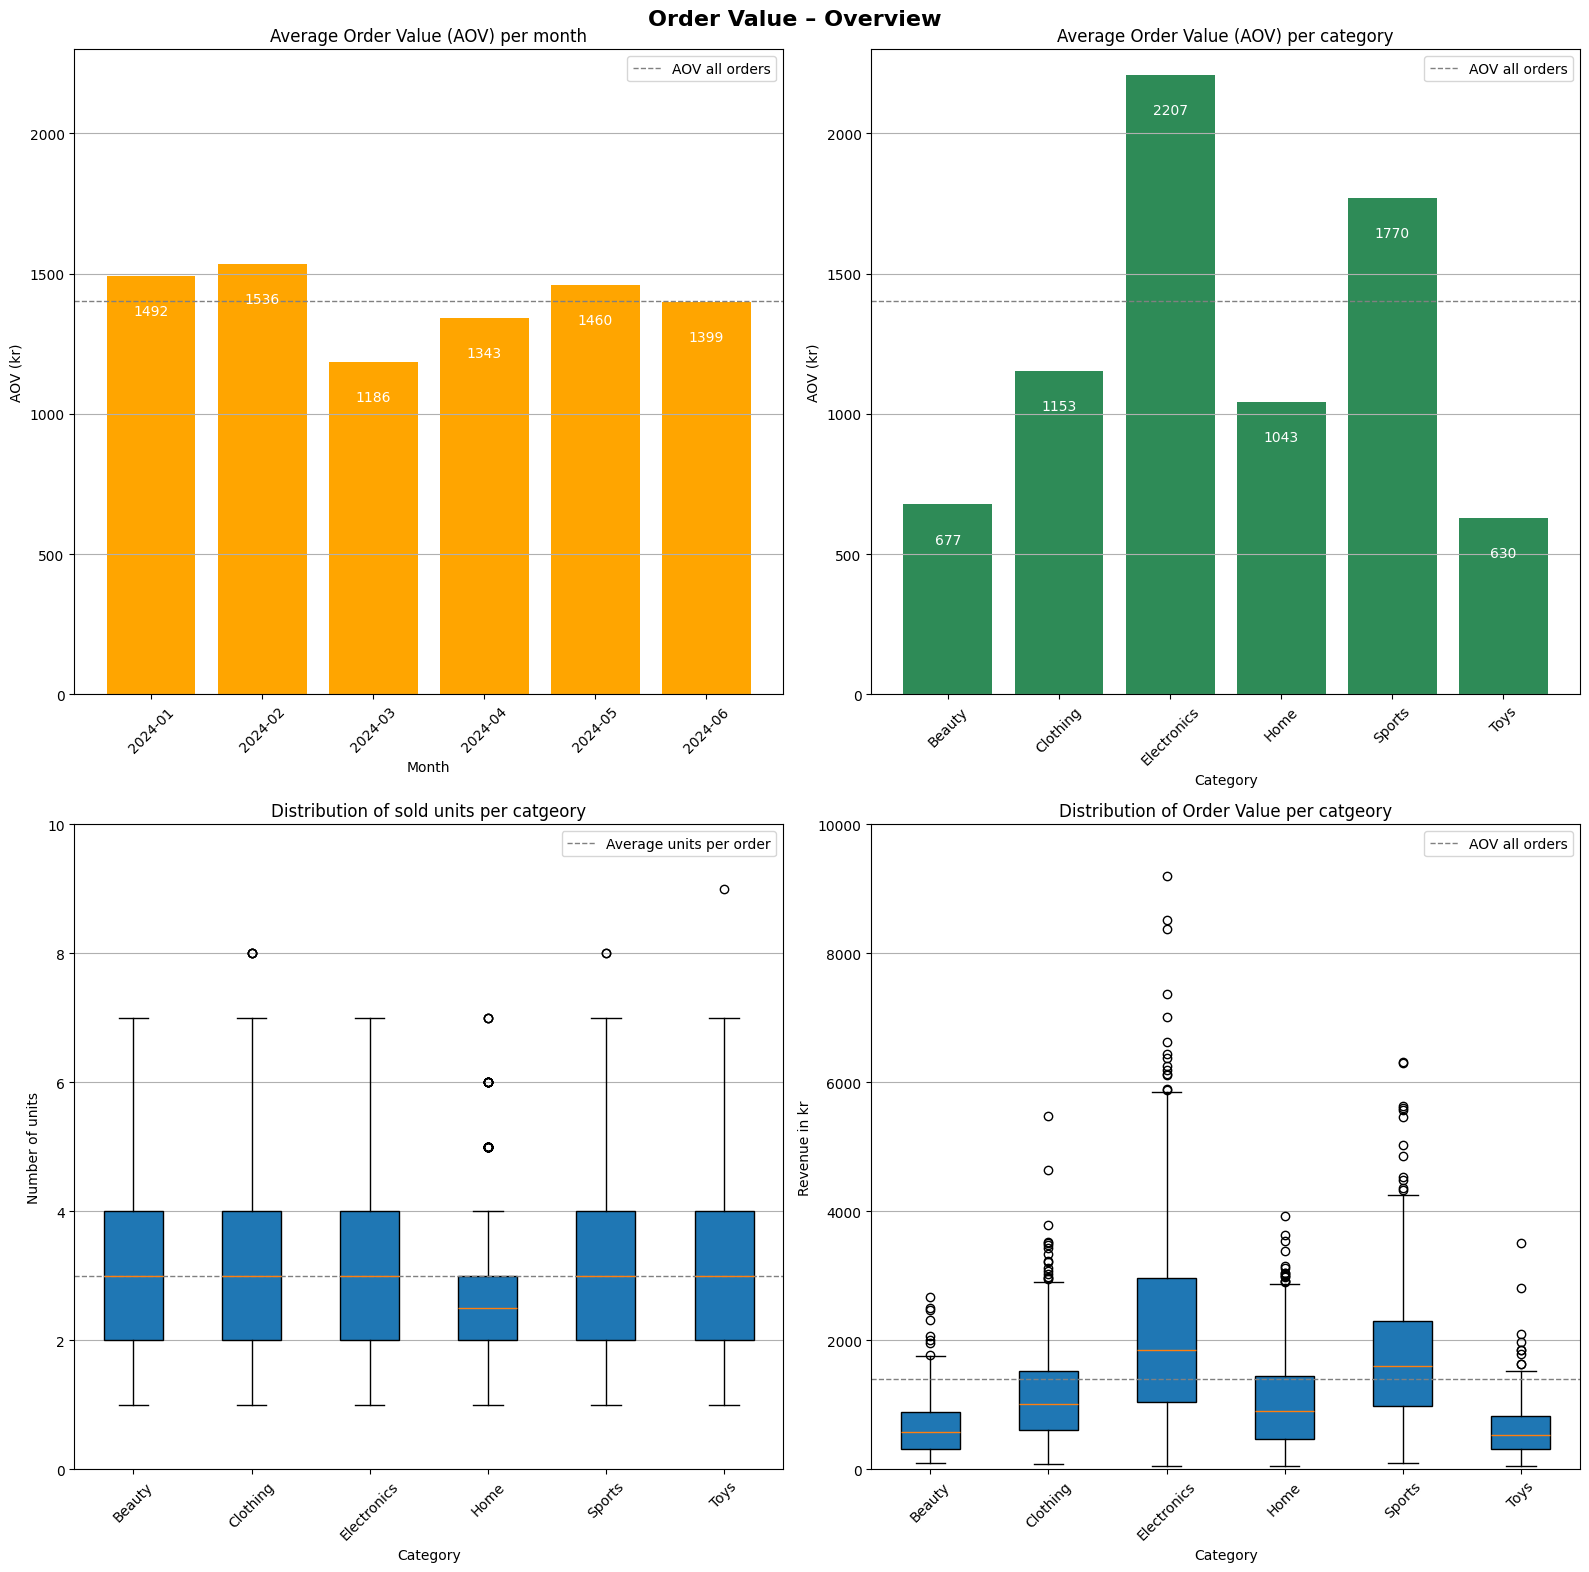

In [6]:
# Calculating Order Value data
monthly_aov, total_aov, category_aov, city_aov, ave_units_per_order = calculate_aov(df_clean)

# Plotting the Order Value data
plot_ov_figure(monthly_aov, total_aov, category_aov, city_aov, ave_units_per_order, df)

### 5. Totalt sålda enheter.

**Nyckeltal:** Totalt sålda enheter (Abdullahi), distribution of sold units per category (Isabel) 

Här undersöker jag det totala antalet sålda enheter i datasetet.
Jag börjar med att läsa in datan och kontrollera att allt ser korrekt ut.


Totalt antal sålda enheter: 7463


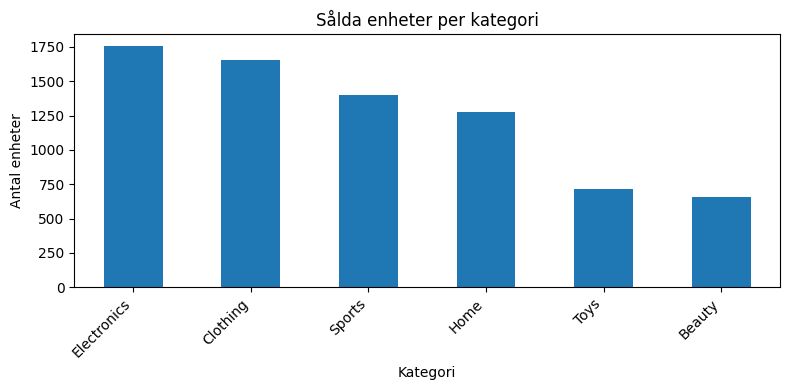

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/ecommerce_sales.csv")


def compute_total_units(df):
    return df["units"].sum()


def plot_units_by_category(df):
    units_by_category = df.groupby("category")["units"].sum().sort_values(ascending=False)
    units_by_category.plot(kind="bar", title="Sålda enheter per kategori", figsize=(8,4))
    plt.xlabel("Kategori")
    plt.ylabel("Antal enheter")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


total_units = compute_total_units(df)
print("Totalt antal sålda enheter:", total_units)

plot_units_by_category(df)


In [8]:
Jag räknade ihop det totala antalet sålda enheter och gjorde ett stapeldiagram
som visar hur många produkter som sålts inom varje kategori.


SyntaxError: invalid syntax (1213618968.py, line 1)

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?

*Insikter om avvikelser som går att utläsa från sammanställning av datan ovan*

## Rekommendationer

Avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.